# Actividad de Clustering con K-Means y t-SNE usando el dataset de Dígitos (8x8)

Esta actividad implica el uso del dataset load_digits de Scikit-Learn, que incluye imágenes de dígitos manuscritos de 8x8 píxeles. Deberás implementar el algoritmo K-Means para el clustering de estos dígitos y emplear t-SNE para visualizar los resultados de una forma comprensible visualmente.



### Bibliotecas

In [247]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Creación de matriz

In [248]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [249]:
Se = StandardScaler()

In [250]:
data = digits.data
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Normalización 

In [251]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df 

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [252]:
for column in df.columns:
    df[column] =Se.fit_transform(df[column].values.reshape(-1, 1))

In [253]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


### Visualización de ciertas imágenes

<Figure size 640x480 with 0 Axes>

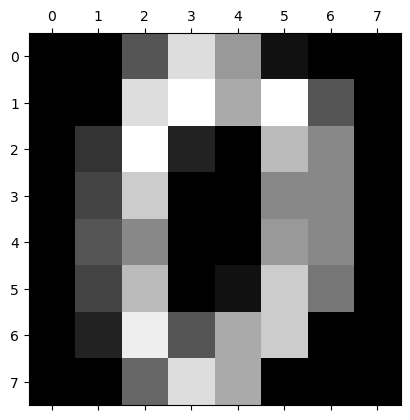

In [254]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

<Figure size 640x480 with 0 Axes>

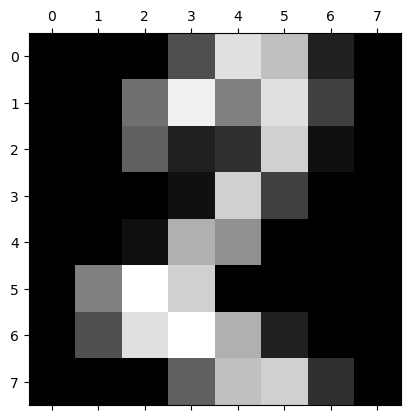

In [255]:
plt.gray()
plt.matshow(digits.images[50])
plt.show()

<Figure size 640x480 with 0 Axes>

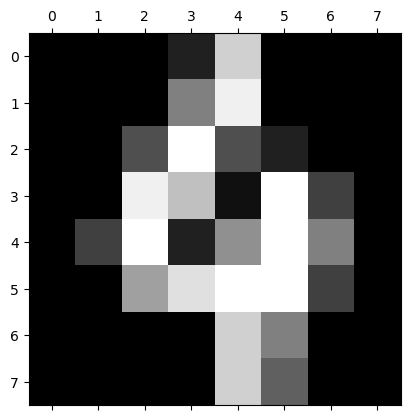

In [256]:
plt.gray()
plt.matshow(digits.images[100])
plt.show()

<Figure size 640x480 with 0 Axes>

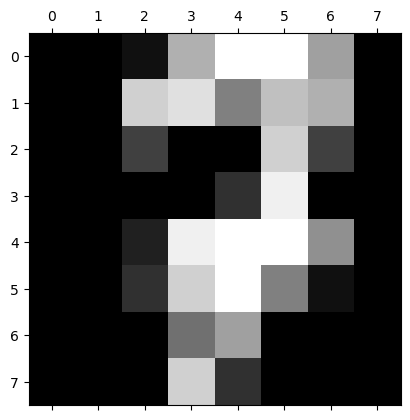

In [257]:
plt.gray()
plt.matshow(digits.images[300])
plt.show()

<Figure size 640x480 with 0 Axes>

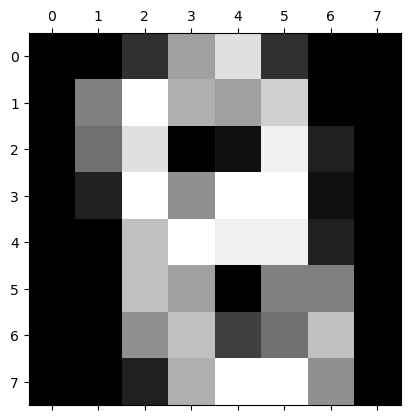

In [258]:
plt.gray()
plt.matshow(digits.images[500])
plt.show()

### Asignación de datos en lo clusters

In [259]:
kmeans = KMeans(n_clusters = 10, random_state = 32)
clusters = kmeans.fit_predict(data)

df1 = df.copy()
df1["cluster"] = clusters

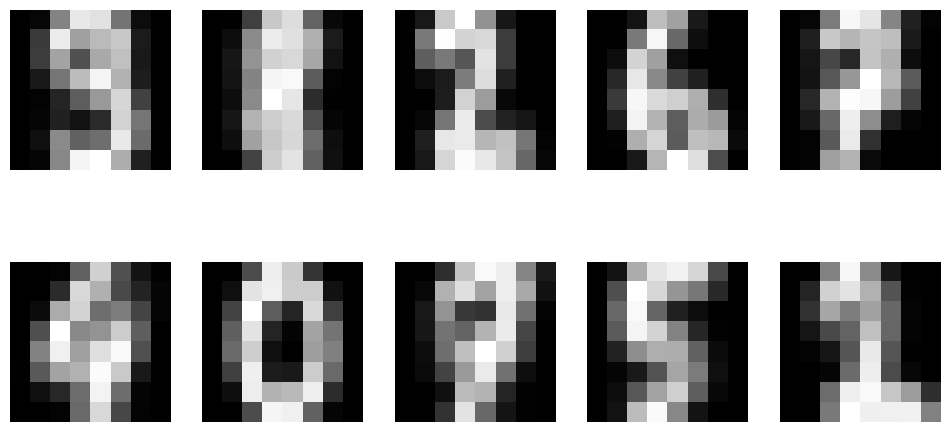

In [260]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for i, ax in enumerate(ax.flat):
    ax.imshow(centers[i])
    ax.axis('off')

plt.show()

In [261]:
for cluster in range(10):
    cluster_data = data[clusters == cluster]
    print(f"Cluster {cluster} tiene {len(cluster_data)} muestras")

Cluster 0 tiene 404 muestras
Cluster 1 tiene 239 muestras
Cluster 2 tiene 114 muestras
Cluster 3 tiene 183 muestras
Cluster 4 tiene 108 muestras
Cluster 5 tiene 218 muestras
Cluster 6 tiene 178 muestras
Cluster 7 tiene 126 muestras
Cluster 8 tiene 148 muestras
Cluster 9 tiene 79 muestras


### Comprobación

#### Davies Bouldin (score)

In [262]:
db = davies_bouldin_score(df, clusters)
db

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

1.9667568870092094

El score de los clusters mediante el método de Davies Bouldin fue de 1.843383890758928

#### Silhouette (score)

In [263]:
silh = silhouette_score(df, kmeans.fit_predict(df))
silh

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.13919741560451535

El score de los clusters mediante el método de Silhouette fue de 0.17209977980256425

In [264]:
centroides = kmeans.cluster_centers_
centroides[:1]

array([[ 0.        ,  0.00267357,  0.49724585,  0.357098  ,  0.23789615,
         0.16015216, -0.17315896, -0.12054853, -0.00981428,  0.37805165,
         0.61268356, -0.70317129, -0.07686565,  0.39807113, -0.12476945,
        -0.12763016, -0.00741335,  0.23798747, -0.04333828, -0.48590398,
         0.21111905,  0.3162435 , -0.14869521, -0.11422184, -0.03337973,
        -0.21421536, -0.27111226,  0.3301944 ,  0.58262085,  0.34355268,
        -0.2083523 , -0.04723238,  0.        , -0.56434513, -0.77924096,
        -0.55830503, -0.27340584,  0.53303196,  0.17655451,  0.        ,
        -0.06134367, -0.42543147, -0.77133684, -0.93149786, -0.83116417,
         0.60065724,  0.65768944, -0.05853778, -0.03543326,  0.05363929,
         0.03433326, -0.72214635, -0.54908193,  0.65805581,  0.41066836,
        -0.1414145 , -0.02359646, -0.04571053,  0.45146487,  0.46824388,
         0.47238717,  0.38021982, -0.07901174, -0.17105397]])

### Visualización de TSNE

In [265]:
df2 = TSNE(n_components = 2, random_state = 45, perplexity = 9)
tsne_df = df2.fit_transform(df1)
tsne_df

array([[ 73.95482  , -11.949303 ],
       [  3.0465796,  -8.347489 ],
       [ -9.973343 ,  21.208347 ],
       ...,
       [-15.83943  ,  -1.833558 ],
       [-54.17671  ,  -9.102218 ],
       [-30.9667   ,  10.954158 ]], dtype=float32)

In [266]:
df3 = TSNE(n_components = 2, random_state = 45, perplexity = 9)
df_centroides = df3.fit_transform(centroides)
df_centroides

array([[-14.349994 ,   6.3138556],
       [-56.474247 ,  18.620214 ],
       [ 51.89251  , -34.26754  ],
       [ 10.644351 , -26.582785 ],
       [ -8.419929 ,  47.91126  ],
       [-73.10227  , -27.77244  ],
       [-40.09127  , -73.518715 ],
       [  9.306319 , -70.72226  ],
       [ 33.229843 ,  15.564412 ],
       [-30.454044 , -31.849342 ]], dtype=float32)

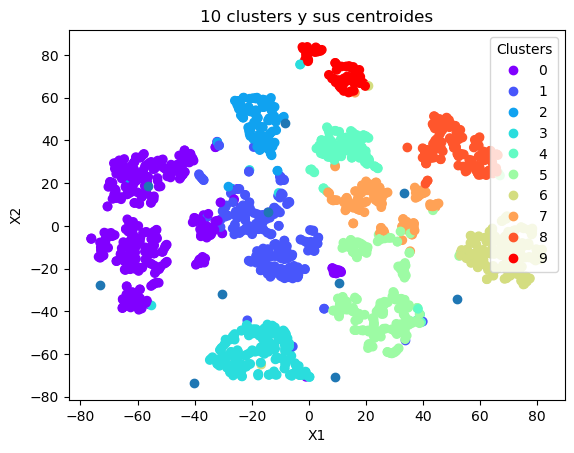

In [267]:
scatter = plt.scatter(tsne_df[:, 0], tsne_df[:, 1], c = df1["cluster"], cmap = "rainbow", label = "Clusters")
plt.scatter(df_centroides[:,0], df_centroides[:,1])
plt.legend(*scatter.legend_elements(), title = "Clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("10 clusters y sus centroides")
plt.show()

Aqui podemos observar la división de los datos en los 10 distintos clusters creados y los centroides de cada uno de estos clusters

### Conclusiones

K-Means y t-SNE son efectivos al realizar esta actividad, esto ya que:

- Este data set esta representado por imágenes de dígitos escrito a mano, K-means puede agrupar eficazmente estas imágenes en los distintos clusters basados en características similares.

- K-Means también nos ayuda a ubicar los centroides que nos pueden proporcionar una representación simplificada de los grupos de datos, lo que facilita su interpretación y análisis.

- t-SNE nos ayuda a visualizar los datos de manera que los datos similares se muestran cerca en un espacio reducido.


